In [54]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
#Importing the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [56]:
#Scaling the data between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [57]:
#Checking if everything went well
X_train.max()

1.0

In [58]:
#Importing stuff related to the model we'll be using
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [59]:
#Configuring the model
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=(["accuracy"]))

In [60]:
#Training the model
model.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3426 - accuracy: 0.9000
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1667 - accuracy: 0.9515
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1241 - accuracy: 0.9625
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0993 - accuracy: 0.9696
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0853 - accuracy: 0.9740
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0736 - accuracy: 0.9773
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0647 - accuracy: 0.9792
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0574 - accuracy: 0.9820
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0524 - accuracy: 0.9832
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0469 - accuracy: 0.9842

In [61]:
#Making predictions
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
#Evaluating the model
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [64]:
#Let's see which numbers are usually confused with each other;
confusion_matrix(y_test, pred)

array([[ 971,    0,    2,    0,    1,    1,    2,    1,    2,    0],
       [   0, 1123,    2,    2,    0,    0,    3,    2,    3,    0],
       [   3,    1, 1013,    3,    2,    0,    1,    5,    4,    0],
       [   0,    0,    2,  996,    0,    4,    0,    5,    2,    1],
       [   1,    0,    1,    0,  965,    0,    2,    0,    2,   11],
       [   2,    0,    0,   13,    2,  869,    0,    1,    3,    2],
       [   5,    3,    2,    2,    6,   11,  925,    0,    4,    0],
       [   1,    3,   10,    3,    1,    0,    0, 1001,    3,    6],
       [   4,    0,    3,    6,    5,    6,    0,    3,  941,    6],
       [   1,    3,    0,    4,    9,    5,    0,    8,    2,  977]])

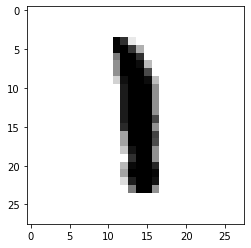

In [65]:
#Making a prediction on a random image;
plt.imshow(X_test[777], cmap="gray_r")

In [68]:
#Checking the result;
np.argmax(model.predict(X_test[777].reshape(1,28,28)), axis=1)

array([1])